In [1]:
#importing useful modules and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
%matplotlib inline
import scipy
import scipy.signal
from scipy.fft import fft, rfft
from scipy.fft import fftfreq, rfftfreq
from math import pi
import mne
from mne.baseline import rescale
from mne.datasets import somato
from mne.stats import bootstrap_confidence_interval

In [2]:
#loading the relevant raw data files
SUB1 = pd.read_csv('/Users/bobmurcko/Desktop/EEG_Data_Analysis/SingleChannelEEG/EEGData/data/subject1.csv', sep = ';')
SUB2 = pd.read_csv('/Users/bobmurcko/Desktop/EEG_Data_Analysis/SingleChannelEEG/EEGData/data/subject2.csv', sep = ';')
SUB3 = pd.read_csv('/Users/bobmurcko/Desktop/EEG_Data_Analysis/SingleChannelEEG/EEGData/data/subject3.csv', sep = ';')
SUB4 = pd.read_csv('/Users/bobmurcko/Desktop/EEG_Data_Analysis/SingleChannelEEG/EEGData/data/subject4.csv', sep = ';')
SUB5 = pd.read_csv('/Users/bobmurcko/Desktop/EEG_Data_Analysis/SingleChannelEEG/EEGData/data/subject5.csv', sep = ';')
SUB6 = pd.read_csv('/Users/bobmurcko/Desktop/EEG_Data_Analysis/SingleChannelEEG/EEGData/data/subject6.csv', sep = ';')
SUB7 = pd.read_csv('/Users/bobmurcko/Desktop/EEG_Data_Analysis/SingleChannelEEG/EEGData/data/subject7.csv', sep = ';')
SUB8 = pd.read_csv('/Users/bobmurcko/Desktop/EEG_Data_Analysis/SingleChannelEEG/EEGData/data/subject8.csv', sep = ';')
SUB9 = pd.read_csv('/Users/bobmurcko/Desktop/EEG_Data_Analysis/SingleChannelEEG/EEGData/data/subject9.csv', sep = ';')
SUB10 = pd.read_csv('/Users/bobmurcko/Desktop/EEG_Data_Analysis/SingleChannelEEG/EEGData/data/subject10.csv', sep = ';')
SUB11 = pd.read_csv('/Users/bobmurcko/Desktop/EEG_Data_Analysis/SingleChannelEEG/EEGData/data/subject11.csv', sep = ';')

In [3]:
#time and frequency information
Fs = 256
T = 1/Fs
L = 16
#time vector
t = np.linspace(0, L, num = Fs*L)

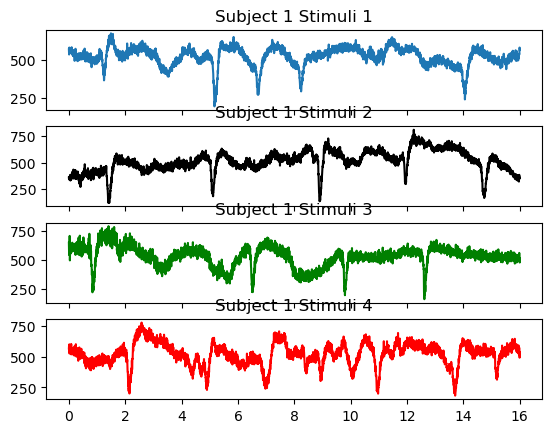

In [4]:
#plotting the raw EEG signal data
fig, axs = plt.subplots(4, sharex=True)

axs[0].plot(t, SUB1.F1)
axs[0].title.set_text('Subject 1 Stimuli 1')
axs[1].plot(t, SUB1.F2, 'k')
axs[1].title.set_text('Subject 1 Stimuli 2')
axs[2].plot(t, SUB1.F3, 'g')
axs[2].title.set_text('Subject 1 Stimuli 3')
axs[3].plot(t, SUB1.F4, 'r')
axs[3].title.set_text('Subject 1 Stimuli 4')

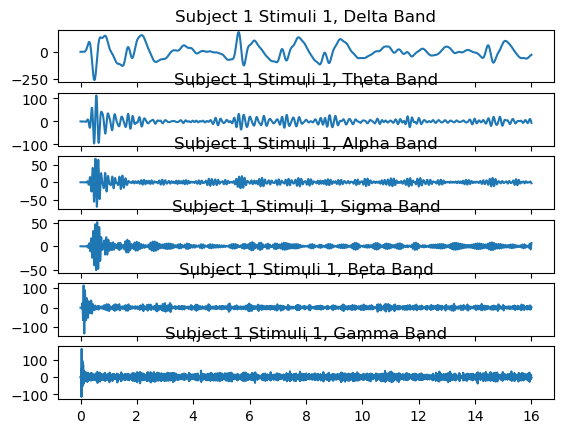

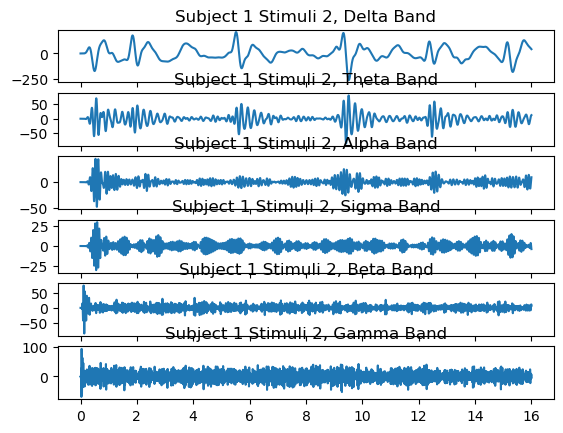

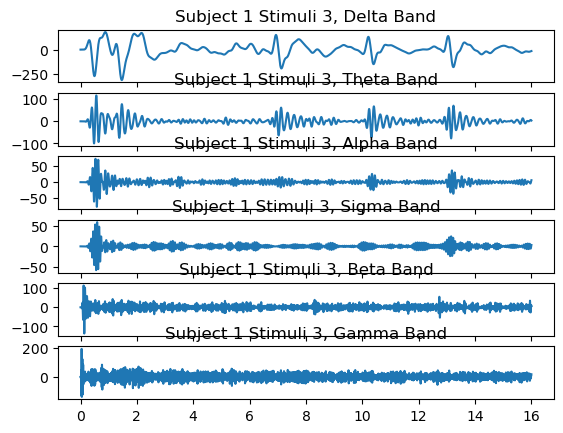

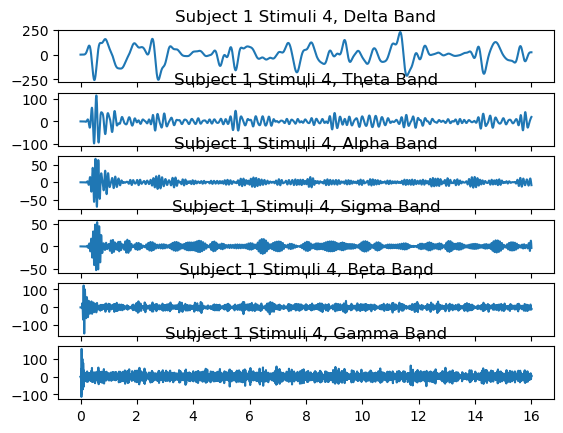

In [5]:
#Common EEG frequency bands are filtered for, then plotted
    #[Delta (0.5−4 Hz), Theta (4−8 Hz), Alpha (8−12 Hz), Sigma (12-16 Hz), Beta (13−30 Hz), Gamma (30−80 Hz)] 
        #Sampling rate of original signal does not allow of identification of the following bands: Ripple (80-200 Hz), Fast Ripple (200-500 Hz)

#Subject 1, Stimuli 1
fig, axs = plt.subplots(6, sharex=True)
        
filt1 = scipy.signal.butter(10, (0.5,4), btype = 'bandpass',analog=False, output='sos', fs = Fs)
SUB1bpfilter1delta = scipy.signal.sosfilt(filt1, SUB1.F1)

filt2 = scipy.signal.butter(10, (4,8), btype = 'bandpass',analog=False, output='sos', fs = Fs)
SUB1bpfilter1theta = scipy.signal.sosfilt(filt2, SUB1.F1)  

filt3 = scipy.signal.butter(10, (8,12), btype = 'bandpass',analog=False, output='sos', fs = Fs)
SUB1bpfilter1alpha = scipy.signal.sosfilt(filt3, SUB1.F1)

filt4 = scipy.signal.butter(10, (12,16), btype = 'bandpass',analog=False, output='sos', fs = Fs)
SUB1bpfilter1sigma = scipy.signal.sosfilt(filt4, SUB1.F1)

filt5 = scipy.signal.butter(10, (13,30), btype = 'bandpass',analog=False, output='sos', fs = Fs)
SUB1bpfilter1beta = scipy.signal.sosfilt(filt5, SUB1.F1)

filt6 = scipy.signal.butter(10, (30,80), btype = 'bandpass',analog=False, output='sos', fs = Fs)
SUB1bpfilter1gamma = scipy.signal.sosfilt(filt6, SUB1.F1) 

axs[0].plot(t, SUB1bpfilter1delta)
axs[0].title.set_text('Subject 1 Stimuli 1, Delta Band')
axs[1].plot(t, SUB1bpfilter1theta)
axs[1].title.set_text('Subject 1 Stimuli 1, Theta Band')
axs[2].plot(t, SUB1bpfilter1alpha)
axs[2].title.set_text('Subject 1 Stimuli 1, Alpha Band')
axs[3].plot(t, SUB1bpfilter1sigma)
axs[3].title.set_text('Subject 1 Stimuli 1, Sigma Band')
axs[4].plot(t, SUB1bpfilter1beta)
axs[4].title.set_text('Subject 1 Stimuli 1, Beta Band')
axs[5].plot(t, SUB1bpfilter1gamma)
axs[5].title.set_text('Subject 1 Stimuli 1, Gamma Band')

#Subject 1, Stimuli 2
fig, axs = plt.subplots(6, sharex=True)
        
filt1 = scipy.signal.butter(10, (0.5,4), btype = 'bandpass',analog=False, output='sos', fs = Fs)
SUB1bpfilter2delta = scipy.signal.sosfilt(filt1, SUB1.F2)

filt2 = scipy.signal.butter(10, (4,8), btype = 'bandpass',analog=False, output='sos', fs = Fs)
SUB1bpfilter2theta = scipy.signal.sosfilt(filt2, SUB1.F2)  

filt3 = scipy.signal.butter(10, (8,12), btype = 'bandpass',analog=False, output='sos', fs = Fs)
SUB1bpfilter2alpha = scipy.signal.sosfilt(filt3, SUB1.F2)

filt4 = scipy.signal.butter(10, (12,16), btype = 'bandpass',analog=False, output='sos', fs = Fs)
SUB1bpfilter2sigma = scipy.signal.sosfilt(filt4, SUB1.F2)

filt5 = scipy.signal.butter(10, (13,30), btype = 'bandpass',analog=False, output='sos', fs = Fs)
SUB1bpfilter2beta = scipy.signal.sosfilt(filt5, SUB1.F2)

filt6 = scipy.signal.butter(10, (30,80), btype = 'bandpass',analog=False, output='sos', fs = Fs)
SUB1bpfilter2gamma = scipy.signal.sosfilt(filt6, SUB1.F2) 

axs[0].plot(t, SUB1bpfilter2delta)
axs[0].title.set_text('Subject 1 Stimuli 2, Delta Band')
axs[1].plot(t, SUB1bpfilter2theta)
axs[1].title.set_text('Subject 1 Stimuli 2, Theta Band')
axs[2].plot(t, SUB1bpfilter2alpha)
axs[2].title.set_text('Subject 1 Stimuli 2, Alpha Band')
axs[3].plot(t, SUB1bpfilter2sigma)
axs[3].title.set_text('Subject 1 Stimuli 2, Sigma Band')
axs[4].plot(t, SUB1bpfilter2beta)
axs[4].title.set_text('Subject 1 Stimuli 2, Beta Band')
axs[5].plot(t, SUB1bpfilter2gamma)
axs[5].title.set_text('Subject 1 Stimuli 2, Gamma Band')

#Subject 1, Stimuli 3
fig, axs = plt.subplots(6, sharex=True)
        
filt1 = scipy.signal.butter(10, (0.5,4), btype = 'bandpass',analog=False, output='sos', fs = Fs)
SUB1bpfilter3delta = scipy.signal.sosfilt(filt1, SUB1.F3)

filt2 = scipy.signal.butter(10, (4,8), btype = 'bandpass',analog=False, output='sos', fs = Fs)
SUB1bpfilter3theta = scipy.signal.sosfilt(filt2, SUB1.F3)  

filt3 = scipy.signal.butter(10, (8,12), btype = 'bandpass',analog=False, output='sos', fs = Fs)
SUB1bpfilter3alpha = scipy.signal.sosfilt(filt3, SUB1.F3)

filt4 = scipy.signal.butter(10, (12,16), btype = 'bandpass',analog=False, output='sos', fs = Fs)
SUB1bpfilter3sigma = scipy.signal.sosfilt(filt4, SUB1.F3)

filt5 = scipy.signal.butter(10, (13,30), btype = 'bandpass',analog=False, output='sos', fs = Fs)
SUB1bpfilter3beta = scipy.signal.sosfilt(filt5, SUB1.F3)

filt6 = scipy.signal.butter(10, (30,80), btype = 'bandpass',analog=False, output='sos', fs = Fs)
SUB1bpfilter3gamma = scipy.signal.sosfilt(filt6, SUB1.F3) 

axs[0].plot(t, SUB1bpfilter3delta)
axs[0].title.set_text('Subject 1 Stimuli 3, Delta Band')
axs[1].plot(t, SUB1bpfilter3theta)
axs[1].title.set_text('Subject 1 Stimuli 3, Theta Band')
axs[2].plot(t, SUB1bpfilter3alpha)
axs[2].title.set_text('Subject 1 Stimuli 3, Alpha Band')
axs[3].plot(t, SUB1bpfilter3sigma)
axs[3].title.set_text('Subject 1 Stimuli 3, Sigma Band')
axs[4].plot(t, SUB1bpfilter3beta)
axs[4].title.set_text('Subject 1 Stimuli 3, Beta Band')
axs[5].plot(t, SUB1bpfilter3gamma)
axs[5].title.set_text('Subject 1 Stimuli 3, Gamma Band')

#Subject 1, Stimuli 4
fig, axs = plt.subplots(6, sharex=True)
        
filt1 = scipy.signal.butter(10, (0.5,4), btype = 'bandpass',analog=False, output='sos', fs = Fs)
SUB1bpfilter4delta = scipy.signal.sosfilt(filt1, SUB1.F4)

filt2 = scipy.signal.butter(10, (4,8), btype = 'bandpass',analog=False, output='sos', fs = Fs)
SUB1bpfilter4theta = scipy.signal.sosfilt(filt2, SUB1.F4)  

filt3 = scipy.signal.butter(10, (8,12), btype = 'bandpass',analog=False, output='sos', fs = Fs)
SUB1bpfilter4alpha = scipy.signal.sosfilt(filt3, SUB1.F4)

filt4 = scipy.signal.butter(10, (12,16), btype = 'bandpass',analog=False, output='sos', fs = Fs)
SUB1bpfilter4sigma = scipy.signal.sosfilt(filt4, SUB1.F4)

filt5 = scipy.signal.butter(10, (13,30), btype = 'bandpass',analog=False, output='sos', fs = Fs)
SUB1bpfilter4beta = scipy.signal.sosfilt(filt5, SUB1.F4)

filt6 = scipy.signal.butter(10, (30,80), btype = 'bandpass',analog=False, output='sos', fs = Fs)
SUB1bpfilter4gamma = scipy.signal.sosfilt(filt6, SUB1.F4) 

axs[0].plot(t, SUB1bpfilter4delta)
axs[0].title.set_text('Subject 1 Stimuli 4, Delta Band')
axs[1].plot(t, SUB1bpfilter4theta)
axs[1].title.set_text('Subject 1 Stimuli 4, Theta Band')
axs[2].plot(t, SUB1bpfilter4alpha)
axs[2].title.set_text('Subject 1 Stimuli 4, Alpha Band')
axs[3].plot(t, SUB1bpfilter4sigma)
axs[3].title.set_text('Subject 1 Stimuli 4, Sigma Band')
axs[4].plot(t, SUB1bpfilter4beta)
axs[4].title.set_text('Subject 1 Stimuli 4, Beta Band')
axs[5].plot(t, SUB1bpfilter4gamma)
axs[5].title.set_text('Subject 1 Stimuli 4, Gamma Band')

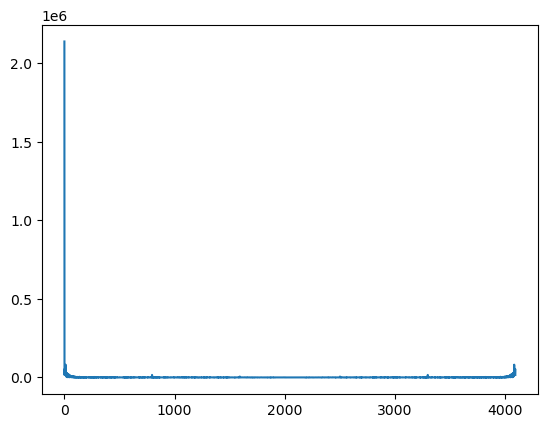

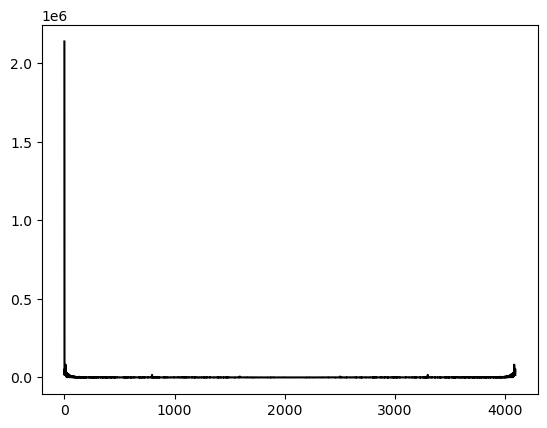

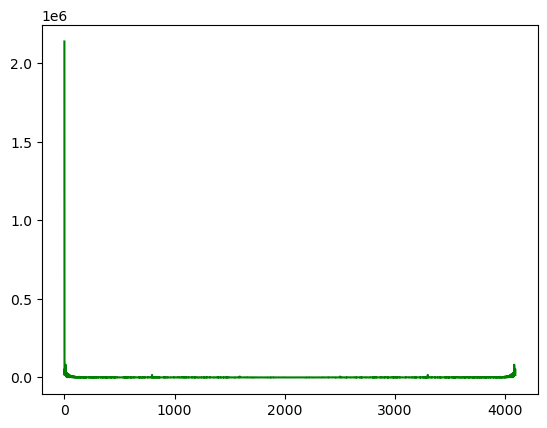

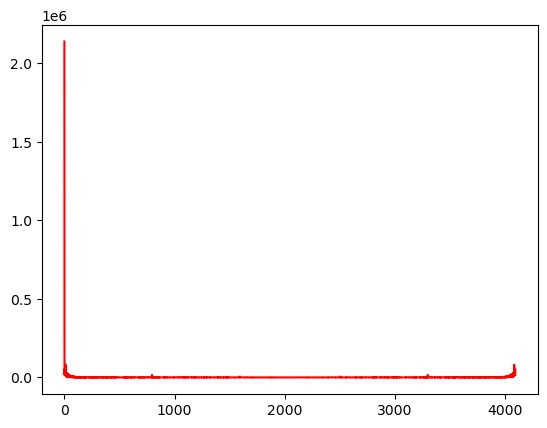

In [6]:
#Applying the FFT to the signal
SUB1fourier1 = fft(SUB1.F1)
SUB1fourier2 = fft(SUB1.F2)
SUB1fourier3 = fft(SUB1.F3)
SUB1fourier4 = fft(SUB1.F4)
#plotting the spectrum |Xk|
plt.plot(np.abs(SUB1fourier1))
plt.show ()
plt.plot(np.abs(SUB1fourier1), 'k')
plt.show ()
plt.plot(np.abs(SUB1fourier1), 'g')
plt.show ()
plt.plot(np.abs(SUB1fourier1), 'r')
plt.show()

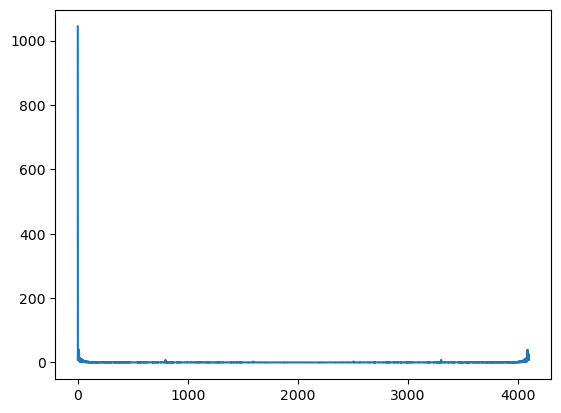

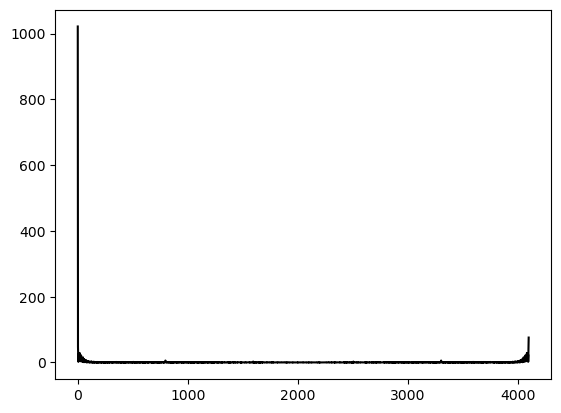

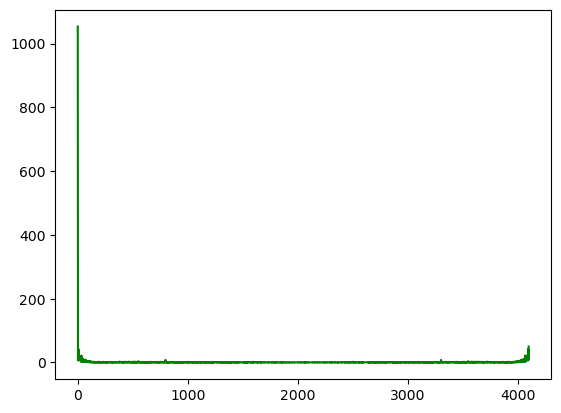

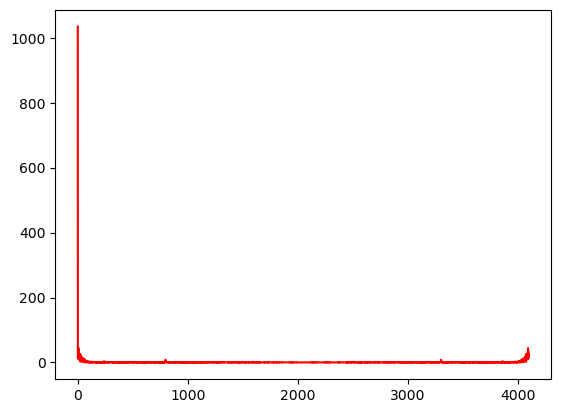

In [122]:
#Preparing to normalize FFT output
N = len(SUB1)
normalize = N/2
#Normalize and plot FFT
plt.plot(np.abs(SUB1fourier1)/normalize)
plt.show ()
plt.plot(np.abs(SUB1fourier2)/normalize, 'k')
plt.show ()
plt.plot(np.abs(SUB1fourier3)/normalize, 'g')
plt.show ()
plt.plot(np.abs(SUB1fourier4)/normalize, 'r')
plt.show()

4096


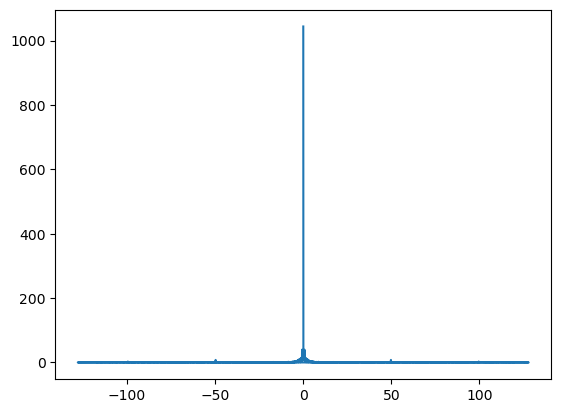

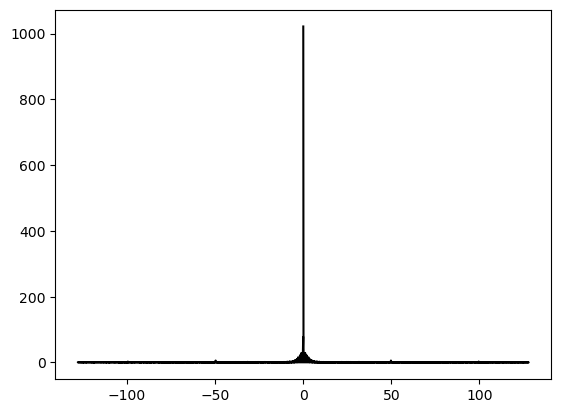

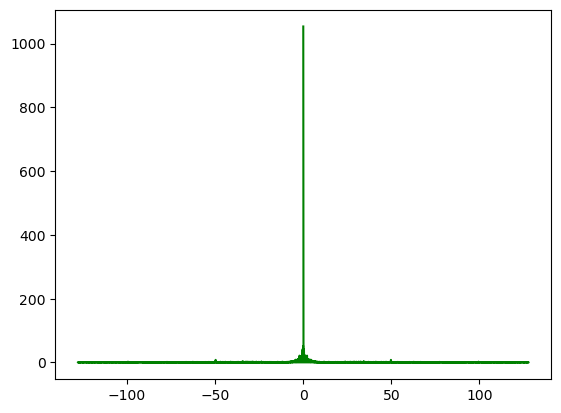

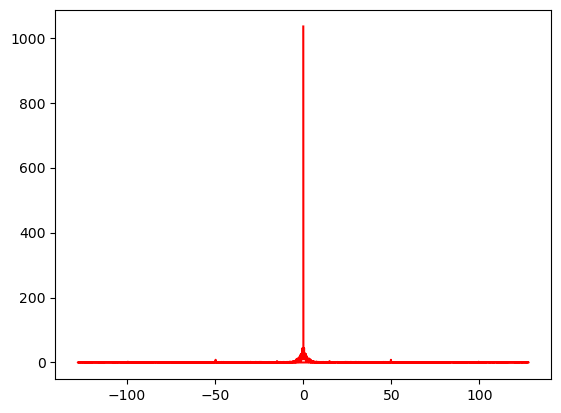

In [123]:
#Frequency components of the spectrum
sampling_rate = 256 
frequency_axis = fftfreq(N, d=1.0/sampling_rate)
print(N)
norm_amplitude1 = np.abs(SUB1fourier1)/normalize
norm_amplitude2 = np.abs(SUB1fourier2)/normalize
norm_amplitude3 = np.abs(SUB1fourier3)/normalize
norm_amplitude4 = np.abs(SUB1fourier4)/normalize
#Plot frequency vs amplitude
plt.plot(frequency_axis, norm_amplitude1)
plt.show ()
plt.plot(frequency_axis, norm_amplitude2, 'k')
plt.show ()
plt.plot(frequency_axis, norm_amplitude3, 'g')
plt.show ()
plt.plot(frequency_axis, norm_amplitude4, 'r')
plt.show()

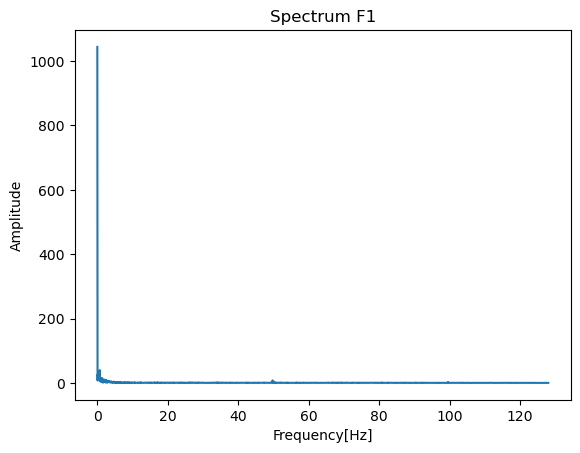

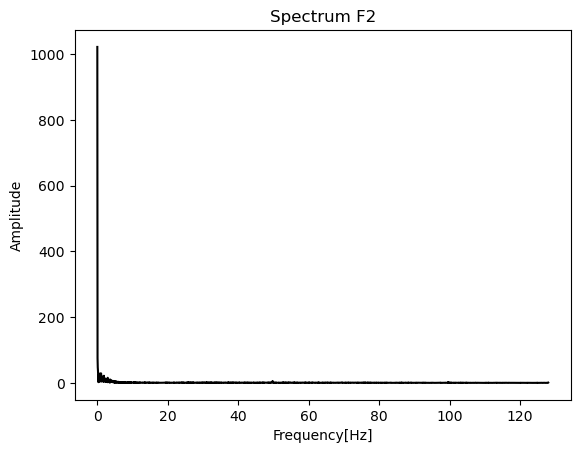

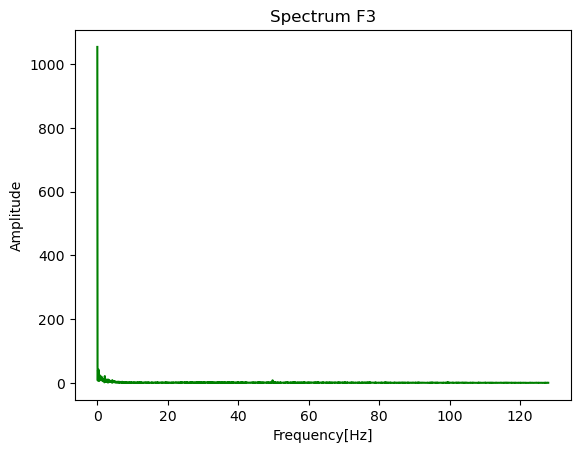

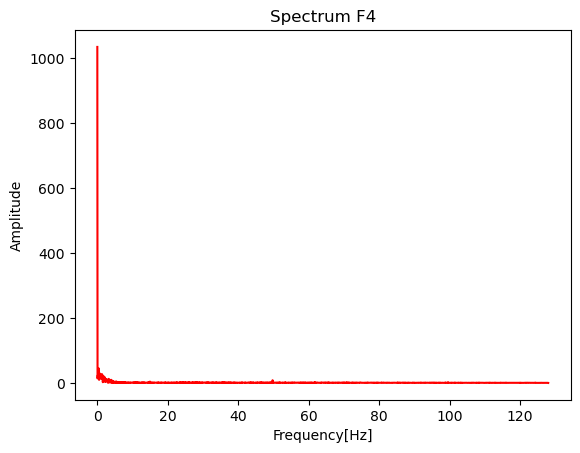

In [9]:
#Plotting the "actual" signal spectrum for each 16 second recording
#F1
plt.plot(rfftfreq(N, d=1/sampling_rate), 2*np.abs(rfft(SUB1.F1))/N)
plt.title('Spectrum F1')
plt.xlabel('Frequency[Hz]')
plt.ylabel('Amplitude')
plt.show()
#F2
plt.plot(rfftfreq(N, d=1/sampling_rate), 2*np.abs(rfft(SUB1.F2))/N, 'k')
plt.title('Spectrum F2')
plt.xlabel('Frequency[Hz]')
plt.ylabel('Amplitude')
plt.show()
#F3
plt.plot(rfftfreq(N, d=1/sampling_rate), 2*np.abs(rfft(SUB1.F3))/N, 'g')
plt.title('Spectrum F3')
plt.xlabel('Frequency[Hz]')
plt.ylabel('Amplitude')
plt.show()
#F4
plt.plot(rfftfreq(N, d=1/sampling_rate), 2*np.abs(rfft(SUB1.F4))/N, 'r')
plt.title('Spectrum F4')
plt.xlabel('Frequency[Hz]')
plt.ylabel('Amplitude')
plt.show()

In [121]:
#Performing DWT on the signal #NOTE THIS SECTION IS STILL A WORK IN PROGRESS#
SUB1dwt1 = pywt.dwt(SUB1.F1, 'db2', mode = 'per')
SUB1dwt1v2 = pywt.dwt(SUB1.F1, 'db2', mode='symmetric', axis=-1)

print(len(SUB1dwt1[0]))
print(len(SUB1dwt1v2[0]))

2048
2049


In [11]:
#Performing CWT on the signal #NOTE THIS SECTION IS STILL A WORK IN PROGRESS#


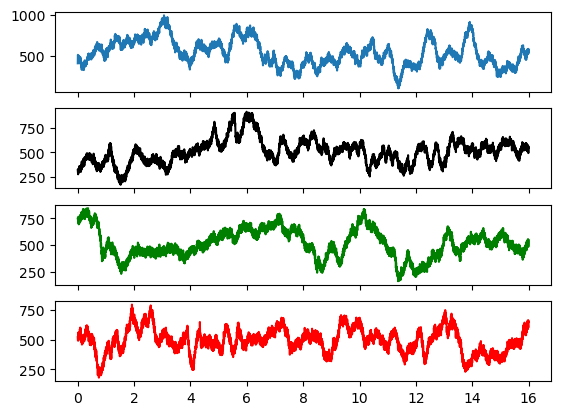

In [12]:
fig, axs = plt.subplots(4, sharex=True)
axs[0].plot(t, SUB2.F1)
axs[1].plot(t, SUB2.F2, 'k')
axs[2].plot(t, SUB2.F3, 'g')
axs[3].plot(t, SUB2.F4, 'r')

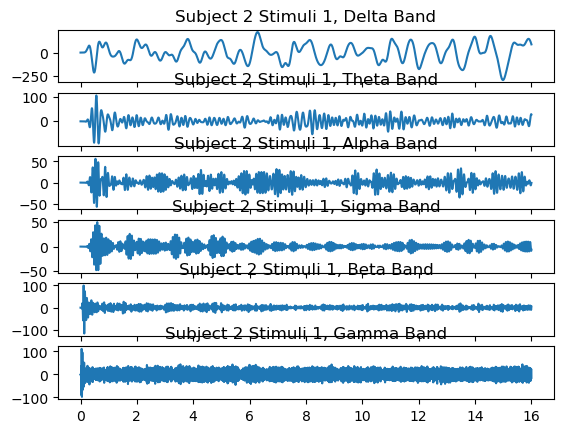

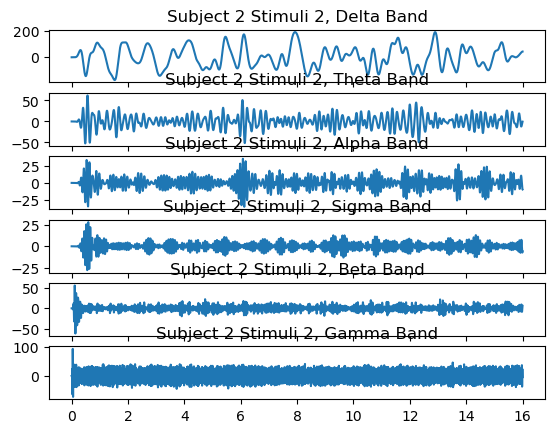

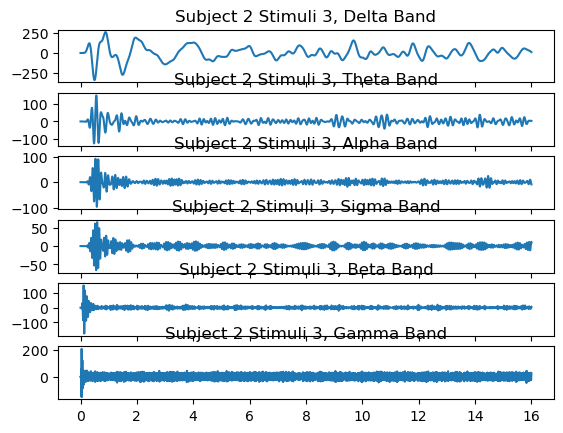

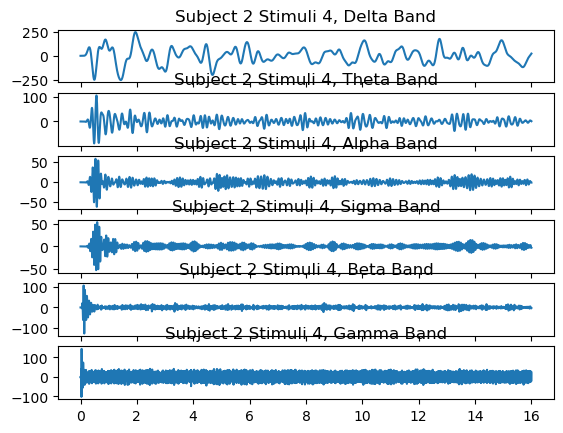

In [13]:
#Common EEG frequency bands are filtered for, then plotted
    #[Delta (0.5−4 Hz), Theta (4−8 Hz), Alpha (8−12 Hz), Sigma (12-16 Hz), Beta (13−30 Hz), Gamma (30−80 Hz)] 
        #Sampling rate of original signal does not allow of identification of the following bands: Ripple (80-200 Hz), Fast Ripple (200-500 Hz)

#Subject 2, Stimuli 1
fig, axs = plt.subplots(6, sharex=True)
        
filt1 = scipy.signal.butter(10, (0.5,4), btype = 'bandpass',analog=False, output='sos', fs = Fs)
SUB2bpfilter1delta = scipy.signal.sosfilt(filt1, SUB2.F1)

filt2 = scipy.signal.butter(10, (4,8), btype = 'bandpass',analog=False, output='sos', fs = Fs)
SUB2bpfilter1theta = scipy.signal.sosfilt(filt2, SUB2.F1)  

filt3 = scipy.signal.butter(10, (8,12), btype = 'bandpass',analog=False, output='sos', fs = Fs)
SUB2bpfilter1alpha = scipy.signal.sosfilt(filt3, SUB2.F1)

filt4 = scipy.signal.butter(10, (12,16), btype = 'bandpass',analog=False, output='sos', fs = Fs)
SUB2bpfilter1sigma = scipy.signal.sosfilt(filt4, SUB2.F1)

filt5 = scipy.signal.butter(10, (13,30), btype = 'bandpass',analog=False, output='sos', fs = Fs)
SUB2bpfilter1beta = scipy.signal.sosfilt(filt5, SUB2.F1)

filt6 = scipy.signal.butter(10, (30,80), btype = 'bandpass',analog=False, output='sos', fs = Fs)
SUB2bpfilter1gamma = scipy.signal.sosfilt(filt6, SUB2.F1) 

axs[0].plot(t, SUB2bpfilter1delta)
axs[0].title.set_text('Subject 2 Stimuli 1, Delta Band')
axs[1].plot(t, SUB2bpfilter1theta)
axs[1].title.set_text('Subject 2 Stimuli 1, Theta Band')
axs[2].plot(t, SUB2bpfilter1alpha)
axs[2].title.set_text('Subject 2 Stimuli 1, Alpha Band')
axs[3].plot(t, SUB2bpfilter1sigma)
axs[3].title.set_text('Subject 2 Stimuli 1, Sigma Band')
axs[4].plot(t, SUB2bpfilter1beta)
axs[4].title.set_text('Subject 2 Stimuli 1, Beta Band')
axs[5].plot(t, SUB2bpfilter1gamma)
axs[5].title.set_text('Subject 2 Stimuli 1, Gamma Band')

#Subject 2, Stimuli 2
fig, axs = plt.subplots(6, sharex=True)
        
filt1 = scipy.signal.butter(10, (0.5,4), btype = 'bandpass',analog=False, output='sos', fs = Fs)
SUB2bpfilter2delta = scipy.signal.sosfilt(filt1, SUB2.F2)

filt2 = scipy.signal.butter(10, (4,8), btype = 'bandpass',analog=False, output='sos', fs = Fs)
SUB2bpfilter2theta = scipy.signal.sosfilt(filt2, SUB2.F2)  

filt3 = scipy.signal.butter(10, (8,12), btype = 'bandpass',analog=False, output='sos', fs = Fs)
SUB2bpfilter2alpha = scipy.signal.sosfilt(filt3, SUB2.F2)

filt4 = scipy.signal.butter(10, (12,16), btype = 'bandpass',analog=False, output='sos', fs = Fs)
SUB2bpfilter2sigma = scipy.signal.sosfilt(filt4, SUB2.F2)

filt5 = scipy.signal.butter(10, (13,30), btype = 'bandpass',analog=False, output='sos', fs = Fs)
SUB2bpfilter2beta = scipy.signal.sosfilt(filt5, SUB2.F2)

filt6 = scipy.signal.butter(10, (30,80), btype = 'bandpass',analog=False, output='sos', fs = Fs)
SUB2bpfilter2gamma = scipy.signal.sosfilt(filt6, SUB2.F2) 

axs[0].plot(t, SUB2bpfilter2delta)
axs[0].title.set_text('Subject 2 Stimuli 2, Delta Band')
axs[1].plot(t, SUB2bpfilter2theta)
axs[1].title.set_text('Subject 2 Stimuli 2, Theta Band')
axs[2].plot(t, SUB2bpfilter2alpha)
axs[2].title.set_text('Subject 2 Stimuli 2, Alpha Band')
axs[3].plot(t, SUB2bpfilter2sigma)
axs[3].title.set_text('Subject 2 Stimuli 2, Sigma Band')
axs[4].plot(t, SUB2bpfilter2beta)
axs[4].title.set_text('Subject 2 Stimuli 2, Beta Band')
axs[5].plot(t, SUB2bpfilter2gamma)
axs[5].title.set_text('Subject 2 Stimuli 2, Gamma Band')

#Subject 2, Stimuli 3
fig, axs = plt.subplots(6, sharex=True)
        
filt1 = scipy.signal.butter(10, (0.5,4), btype = 'bandpass',analog=False, output='sos', fs = Fs)
SUB2bpfilter3delta = scipy.signal.sosfilt(filt1, SUB2.F3)

filt2 = scipy.signal.butter(10, (4,8), btype = 'bandpass',analog=False, output='sos', fs = Fs)
SUB2bpfilter3theta = scipy.signal.sosfilt(filt2, SUB2.F3)  

filt3 = scipy.signal.butter(10, (8,12), btype = 'bandpass',analog=False, output='sos', fs = Fs)
SUB2bpfilter3alpha = scipy.signal.sosfilt(filt3, SUB2.F3)

filt4 = scipy.signal.butter(10, (12,16), btype = 'bandpass',analog=False, output='sos', fs = Fs)
SUB2bpfilter3sigma = scipy.signal.sosfilt(filt4, SUB2.F3)

filt5 = scipy.signal.butter(10, (13,30), btype = 'bandpass',analog=False, output='sos', fs = Fs)
SUB2bpfilter3beta = scipy.signal.sosfilt(filt5, SUB2.F3)

filt6 = scipy.signal.butter(10, (30,80), btype = 'bandpass',analog=False, output='sos', fs = Fs)
SUB2bpfilter3gamma = scipy.signal.sosfilt(filt6, SUB2.F3) 

axs[0].plot(t, SUB2bpfilter3delta)
axs[0].title.set_text('Subject 2 Stimuli 3, Delta Band')
axs[1].plot(t, SUB2bpfilter3theta)
axs[1].title.set_text('Subject 2 Stimuli 3, Theta Band')
axs[2].plot(t, SUB2bpfilter3alpha)
axs[2].title.set_text('Subject 2 Stimuli 3, Alpha Band')
axs[3].plot(t, SUB2bpfilter3sigma)
axs[3].title.set_text('Subject 2 Stimuli 3, Sigma Band')
axs[4].plot(t, SUB2bpfilter3beta)
axs[4].title.set_text('Subject 2 Stimuli 3, Beta Band')
axs[5].plot(t, SUB2bpfilter3gamma)
axs[5].title.set_text('Subject 2 Stimuli 3, Gamma Band')

#Subject 2, Stimuli 4
fig, axs = plt.subplots(6, sharex=True)
        
filt1 = scipy.signal.butter(10, (0.5,4), btype = 'bandpass',analog=False, output='sos', fs = Fs)
SUB2bpfilter4delta = scipy.signal.sosfilt(filt1, SUB2.F4)

filt2 = scipy.signal.butter(10, (4,8), btype = 'bandpass',analog=False, output='sos', fs = Fs)
SUB2bpfilter4theta = scipy.signal.sosfilt(filt2, SUB2.F4)  

filt3 = scipy.signal.butter(10, (8,12), btype = 'bandpass',analog=False, output='sos', fs = Fs)
SUB2bpfilter4alpha = scipy.signal.sosfilt(filt3, SUB2.F4)

filt4 = scipy.signal.butter(10, (12,16), btype = 'bandpass',analog=False, output='sos', fs = Fs)
SUB2bpfilter4sigma = scipy.signal.sosfilt(filt4, SUB2.F4)

filt5 = scipy.signal.butter(10, (13,30), btype = 'bandpass',analog=False, output='sos', fs = Fs)
SUB2bpfilter4beta = scipy.signal.sosfilt(filt5, SUB2.F4)

filt6 = scipy.signal.butter(10, (30,80), btype = 'bandpass',analog=False, output='sos', fs = Fs)
SUB2bpfilter4gamma = scipy.signal.sosfilt(filt6, SUB2.F4) 

axs[0].plot(t, SUB2bpfilter4delta)
axs[0].title.set_text('Subject 2 Stimuli 4, Delta Band')
axs[1].plot(t, SUB2bpfilter4theta)
axs[1].title.set_text('Subject 2 Stimuli 4, Theta Band')
axs[2].plot(t, SUB2bpfilter4alpha)
axs[2].title.set_text('Subject 2 Stimuli 4, Alpha Band')
axs[3].plot(t, SUB2bpfilter4sigma)
axs[3].title.set_text('Subject 2 Stimuli 4, Sigma Band')
axs[4].plot(t, SUB2bpfilter4beta)
axs[4].title.set_text('Subject 2 Stimuli 4, Beta Band')
axs[5].plot(t, SUB2bpfilter4gamma)
axs[5].title.set_text('Subject 2 Stimuli 4, Gamma Band')

In [14]:
SUB2fourier1 = fft(SUB2.F1)
SUB2fourier2 = fft(SUB2.F2)
SUB2fourier3 = fft(SUB2.F3)
SUB2fourier4 = fft(SUB2.F4)

In [15]:
SUB2fourier1

array([2213784.             -0.j        ,
         73892.56338923-190001.08548545j,
       -140763.1734737  -26701.50281999j, ...,
        -43443.49241044 +35202.90493502j,
       -140763.1734737  +26701.50281999j,
         73892.56338923+190001.08548545j])

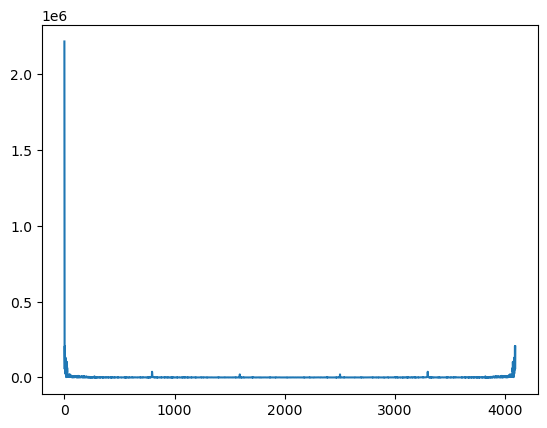

In [16]:
plt.plot(np.abs(SUB2fourier1))

In [17]:
SUB2fourier2

array([2097331.             -0.j        ,
       -126686.61703383 -46463.65523967j,
         28634.86098344+196164.1458622j , ...,
         51720.1908447  -58979.82310039j,
         28634.86098344-196164.1458622j ,
       -126686.61703383 +46463.65523967j])

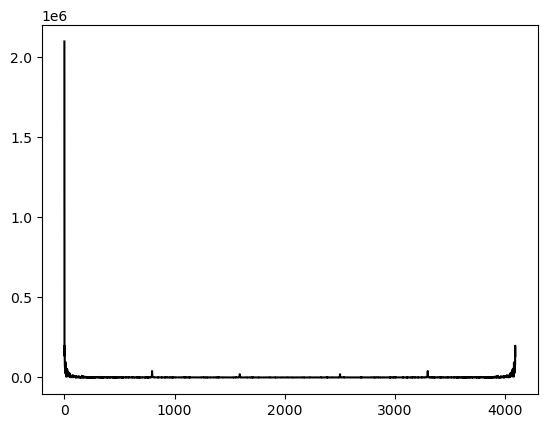

In [18]:
plt.plot(np.abs(SUB2fourier2), 'k')

In [19]:
SUB2fourier3

array([2108128.             -0.j        ,
        -60628.76410117 -55892.92030783j,
        140037.92162009+104868.93843455j, ...,
        123518.90569588 -12251.19870969j,
        140037.92162009-104868.93843455j,
        -60628.76410117 +55892.92030783j])

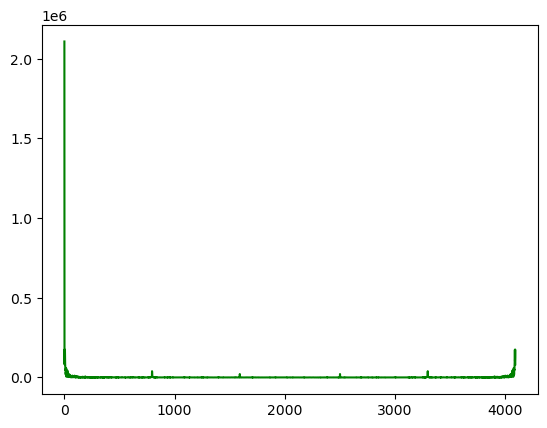

In [20]:
plt.plot(np.abs(SUB2fourier3), 'g')

In [21]:
SUB2fourier4

array([2024507.            -0.j        ,  -57717.71176756-26408.6623376j ,
        -12812.0860217 -65634.12895317j, ...,
        -38708.32266734+44207.46454007j,  -12812.0860217 +65634.12895317j,
        -57717.71176756+26408.6623376j ])

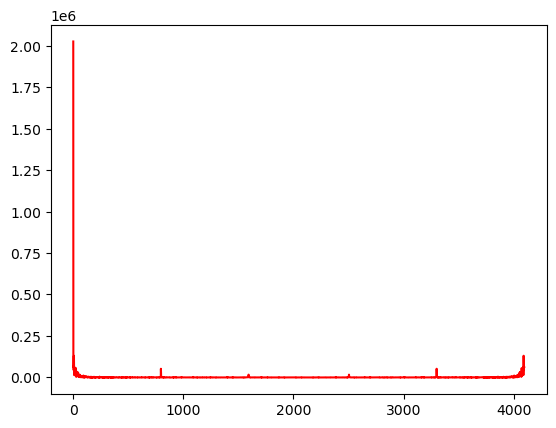

In [22]:
plt.plot(np.abs(SUB2fourier4), 'r')

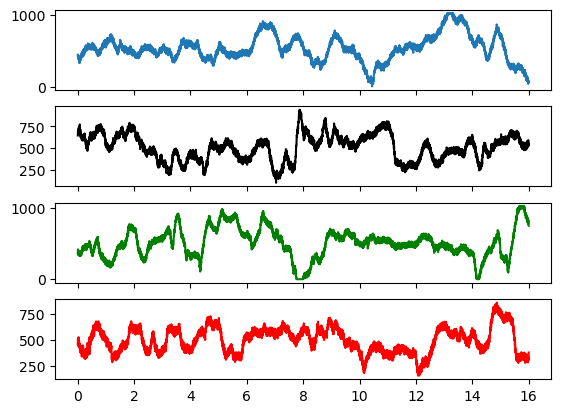

In [23]:
fig, axs = plt.subplots(4, sharex=True)
axs[0].plot(t, SUB3.F1)
axs[1].plot(t, SUB3.F2, 'k')
axs[2].plot(t, SUB3.F3, 'g')
axs[3].plot(t, SUB3.F4, 'r')

In [24]:
SUB3fourier1 = fft(SUB3.F1)
SUB3fourier2 = fft(SUB3.F2)
SUB3fourier3 = fft(SUB3.F3)
SUB3fourier4 = fft(SUB3.F4)

In [25]:
SUB3fourier1

array([2221765.             -0.j        ,
         35871.75139931 +58972.55093409j,
        -36641.47113049+214931.29536609j, ...,
       -252926.92795856+108366.45723356j,
        -36641.47113049-214931.29536609j,
         35871.75139931 -58972.55093409j])

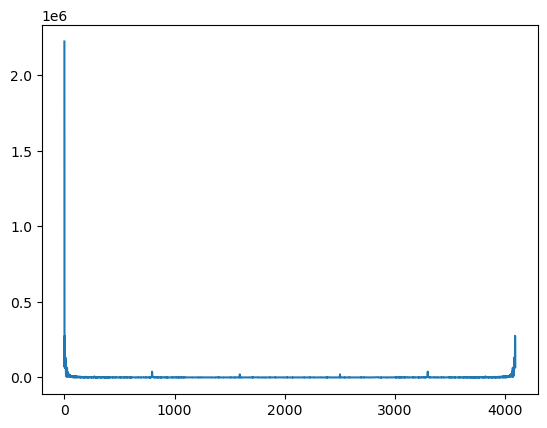

In [26]:
plt.plot(np.abs(SUB3fourier1))

In [27]:
SUB3fourier2

array([2083732.             -0.j        ,
         35986.92307449 +62304.72010151j,
        177915.24234624-148169.0047311j , ...,
         94494.13915592 -28271.05252041j,
        177915.24234624+148169.0047311j ,
         35986.92307449 -62304.72010151j])

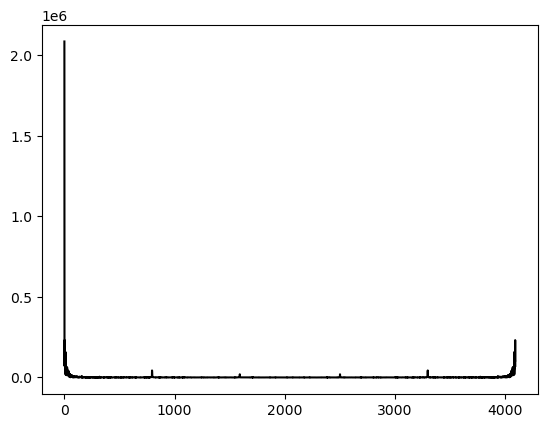

In [28]:
plt.plot(np.abs(SUB3fourier2), 'k')

In [29]:
SUB3fourier3

array([2080192.             -0.j        ,
        -60100.66836436-128240.63308589j,
       -126058.88110415 +41790.0479671j , ...,
        237524.99039813 +28798.80103307j,
       -126058.88110415 -41790.0479671j ,
        -60100.66836436+128240.63308589j])

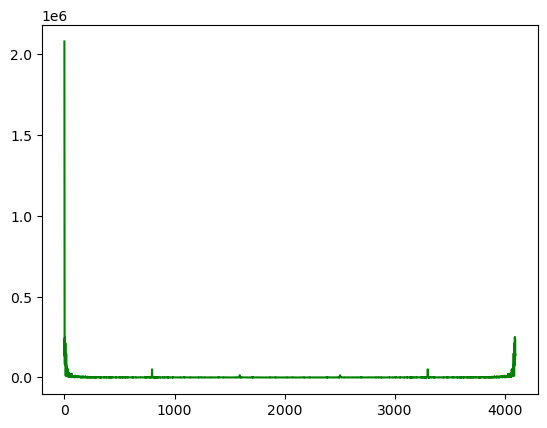

In [30]:
plt.plot(np.abs(SUB3fourier3), 'g')

In [31]:
SUB3fourier4

array([2060392.            -0.j        ,   -6052.67503962-60371.50453976j,
         96127.64860666+88111.39142744j, ...,
        -84577.57021004-86428.49958887j,   96127.64860666-88111.39142744j,
         -6052.67503962+60371.50453976j])

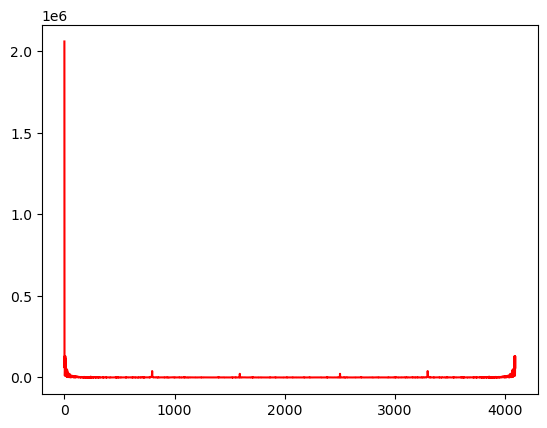

In [32]:
plt.plot(np.abs(SUB3fourier4), 'r')

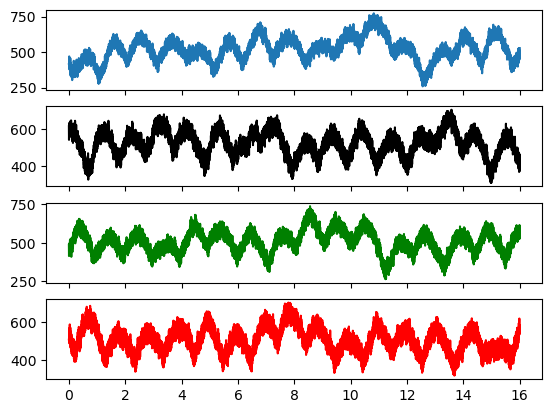

In [33]:
fig, axs = plt.subplots(4, sharex=True)
axs[0].plot(t, SUB4.F1)
axs[1].plot(t, SUB4.F2, 'k')
axs[2].plot(t, SUB4.F3, 'g')
axs[3].plot(t, SUB4.F4, 'r')

In [34]:
SUB4fourier1 = fft(SUB4.F1)
SUB4fourier2 = fft(SUB4.F2)
SUB4fourier3 = fft(SUB4.F3)
SUB4fourier4 = fft(SUB4.F4)

In [35]:
SUB4fourier1

array([2109217.            -0.j        ,  -73125.86839054+37193.69492109j,
         -8110.33799036-34746.00945765j, ...,
         17005.50760512-33404.23219614j,   -8110.33799036+34746.00945765j,
        -73125.86839054-37193.69492109j])

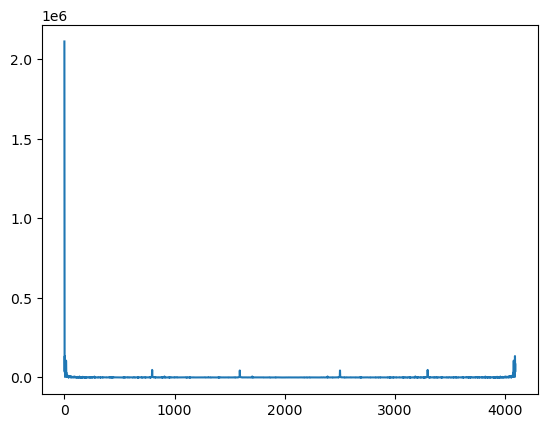

In [36]:
plt.plot(np.abs(SUB4fourier1))

In [37]:
SUB4fourier2

array([2129672.            -0.j        ,    3989.42338659-21109.11075575j,
        -31115.2549546 +20444.46520608j, ...,
        -36039.38584535 -1697.02111347j,  -31115.2549546 -20444.46520608j,
          3989.42338659+21109.11075575j])

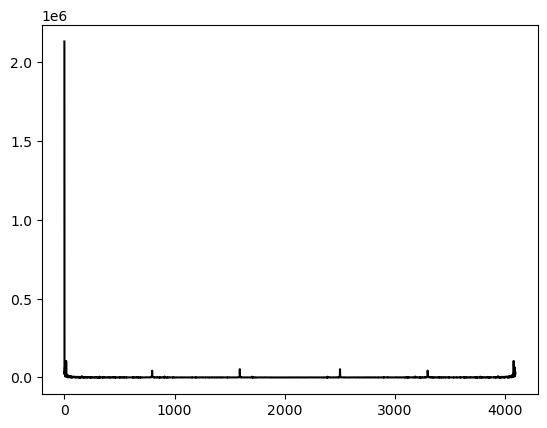

In [38]:
plt.plot(np.abs(SUB4fourier2), 'k')

In [39]:
SUB4fourier3

array([2063451.            -0.j        ,  -45273.10437807 -2404.20506491j,
         46480.56795362-25220.05652292j, ...,
         24079.02719094-58249.80619945j,   46480.56795362+25220.05652292j,
        -45273.10437807 +2404.20506491j])

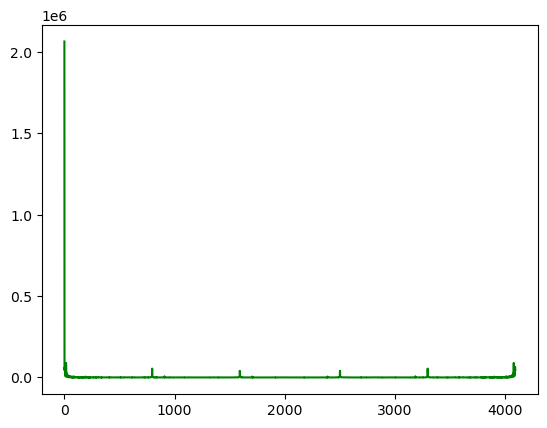

In [40]:
plt.plot(np.abs(SUB4fourier3), 'g')

In [41]:
SUB4fourier4

array([2058394.            -0.j        ,  -41622.84692513-18709.87858598j,
         25198.38456519 -4374.80147755j, ...,
        -22934.906636  +23376.96979546j,   25198.38456519 +4374.80147755j,
        -41622.84692513+18709.87858598j])

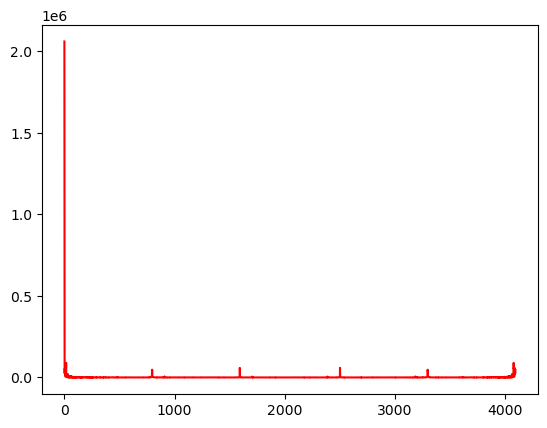

In [42]:
plt.plot(np.abs(SUB4fourier4), 'r')

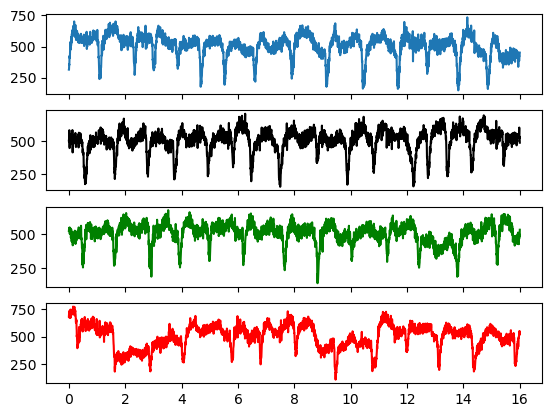

In [43]:
fig, axs = plt.subplots(4, sharex=True)
axs[0].plot(t, SUB5.F1)
axs[1].plot(t, SUB5.F2, 'k')
axs[2].plot(t, SUB5.F3, 'g')
axs[3].plot(t, SUB5.F4, 'r')

In [44]:
SUB5fourier1 = fft(SUB5.F1)
SUB5fourier2 = fft(SUB5.F2)
SUB5fourier3 = fft(SUB5.F3)
SUB5fourier4 = fft(SUB5.F4)

In [45]:
SUB5fourier1

array([2074306.            -0.j        ,   10335.06539254-19437.45608357j,
         -5312.61995447-51760.29445109j, ...,
        -33301.55448586+27809.86805927j,   -5312.61995447+51760.29445109j,
         10335.06539254+19437.45608357j])

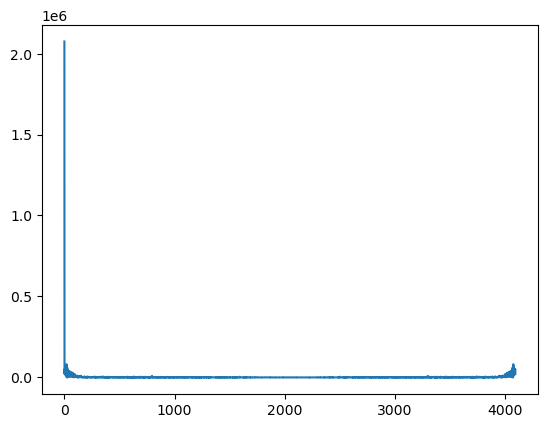

In [46]:
plt.plot(np.abs(SUB5fourier1))

In [47]:
SUB5fourier2

array([2.07775000e+06    -0.j        , 2.27046495e+03+17911.23060891j,
       1.37662017e+03+25271.9238567j , ...,
       1.78605992e+03-19946.52029049j, 1.37662017e+03-25271.9238567j ,
       2.27046495e+03-17911.23060891j])

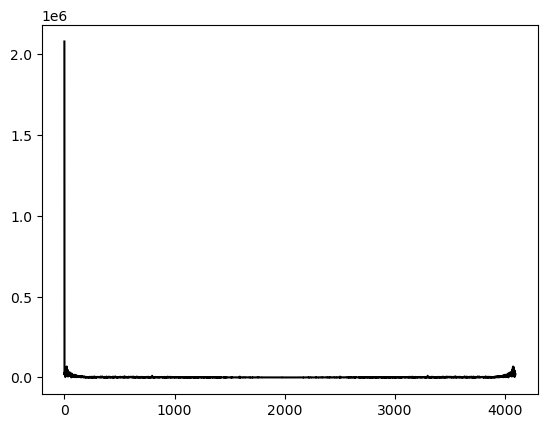

In [48]:
plt.plot(np.abs(SUB5fourier2), 'k')

In [49]:
SUB5fourier3

array([2067982.            -0.j        ,   -9115.46168455-50402.39716007j,
          8073.88346756-11047.60125033j, ...,
         35227.3808985  +1771.14696276j,    8073.88346756+11047.60125033j,
         -9115.46168455+50402.39716007j])

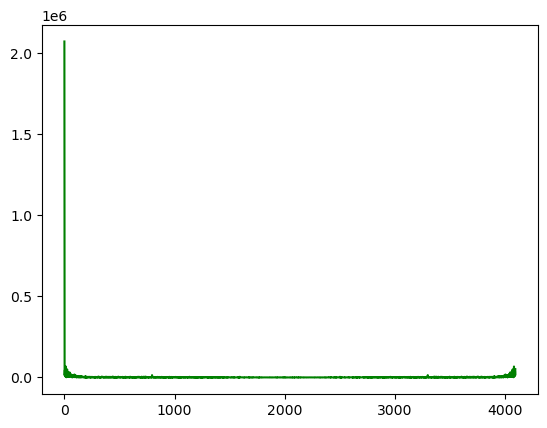

In [50]:
plt.plot(np.abs(SUB5fourier3), 'g')

In [51]:
SUB5fourier4

array([2046693.             -0.j        ,
        -20836.19830633 +22117.94050111j,
         25990.49640792+100129.96736639j, ...,
         50259.2018239  +67076.61321887j,
         25990.49640792-100129.96736639j,
        -20836.19830633 -22117.94050111j])

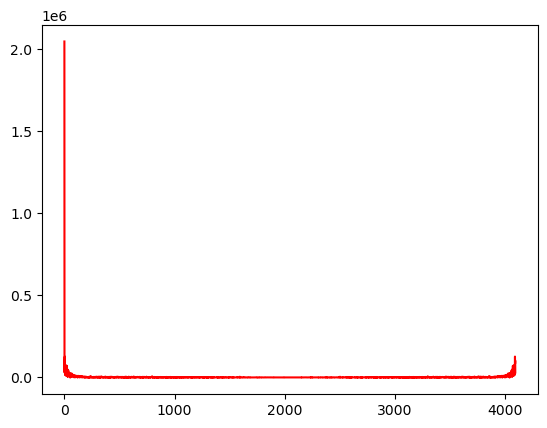

In [52]:
plt.plot(np.abs(SUB5fourier4), 'r')

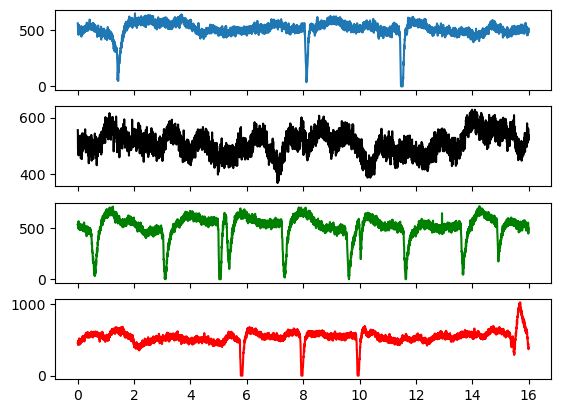

In [53]:
fig, axs = plt.subplots(4, sharex=True)
axs[0].plot(t, SUB6.F1)
axs[1].plot(t, SUB6.F2, 'k')
axs[2].plot(t, SUB6.F3, 'g')
axs[3].plot(t, SUB6.F4, 'r')

In [54]:
SUB6fourier1 = fft(SUB6.F1)
SUB6fourier2 = fft(SUB6.F2)
SUB6fourier3 = fft(SUB6.F3)
SUB6fourier4 = fft(SUB6.F4)

In [55]:
SUB6fourier1

array([2085163.            -0.j        ,  -21557.84803579-24746.18340091j,
        -11783.46928027-24824.28562992j, ...,
        -29267.47766835-35387.79411999j,  -11783.46928027+24824.28562992j,
        -21557.84803579+24746.18340091j])

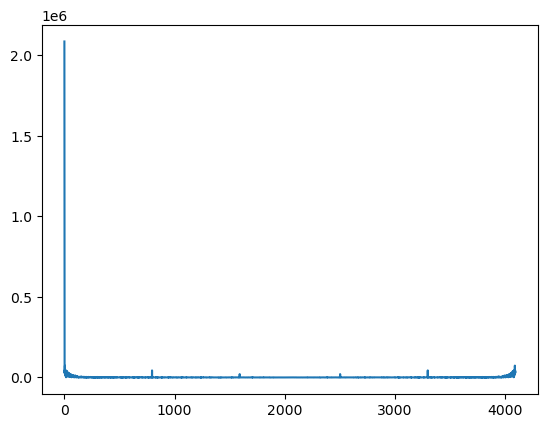

In [56]:
plt.plot(np.abs(SUB6fourier1))

In [57]:
SUB6fourier2

array([2092259.            -0.j        ,   31329.97493049  -575.77784856j,
         36401.94529714 +2722.15918232j, ...,
        -28394.54384976-28920.09110757j,   36401.94529714 -2722.15918232j,
         31329.97493049  +575.77784856j])

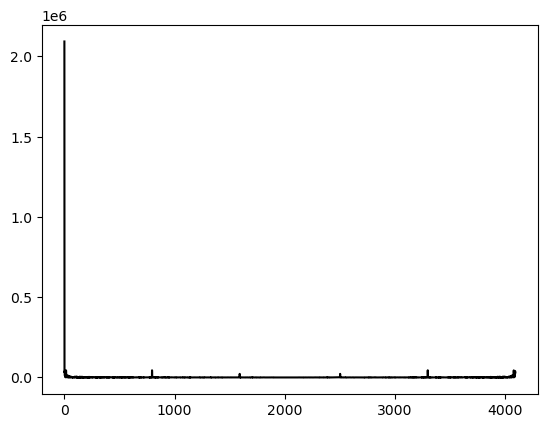

In [58]:
plt.plot(np.abs(SUB6fourier2), 'k')

In [59]:
SUB6fourier3

array([ 2.08833100e+06    -0.j        , -6.44433267e+03-27856.65089655j,
        3.21703904e+04+34367.77941459j, ...,
       -1.69975520e+03  -577.57280337j,  3.21703904e+04-34367.77941459j,
       -6.44433267e+03+27856.65089655j])

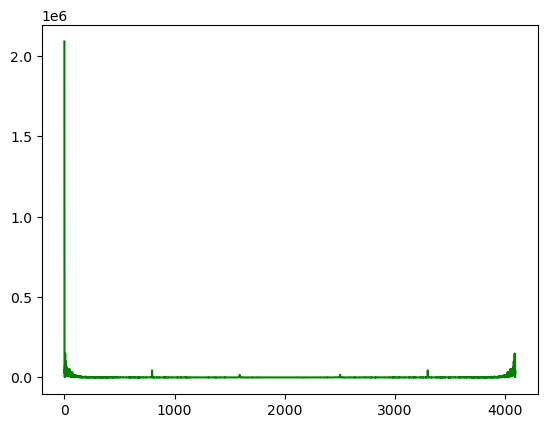

In [60]:
plt.plot(np.abs(SUB6fourier3), 'g')

In [61]:
SUB6fourier4

array([2211449.            -0.j        ,   50568.32720834+33769.84135404j,
         74865.37573802+19072.82301737j, ...,
          7770.71257896-15324.08074502j,   74865.37573802-19072.82301737j,
         50568.32720834-33769.84135404j])

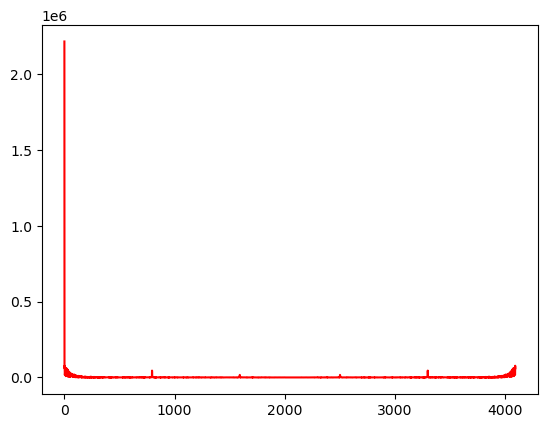

In [62]:
plt.plot(np.abs(SUB6fourier4), 'r')

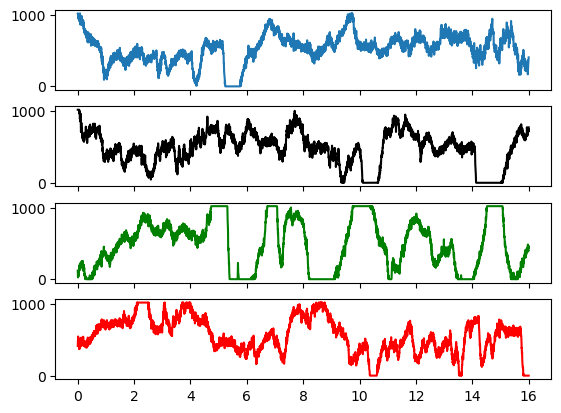

In [63]:
fig, axs = plt.subplots(4, sharex=True)
axs[0].plot(t, SUB7.F1)
axs[1].plot(t, SUB7.F2, 'k')
axs[2].plot(t, SUB7.F3, 'g')
axs[3].plot(t, SUB7.F4, 'r')

In [64]:
SUB7fourier1 = fft(SUB7.F1)
SUB7fourier2 = fft(SUB7.F2)
SUB7fourier3 = fft(SUB7.F3)
SUB7fourier4 = fft(SUB7.F4)

In [65]:
SUB7fourier1

array([2149869.             -0.j        ,
        -60428.87745356+279957.78668184j,
        124082.66155102 +16154.61501236j, ...,
        -46989.68292719  +6981.60479344j,
        124082.66155102 -16154.61501236j,
        -60428.87745356-279957.78668184j])

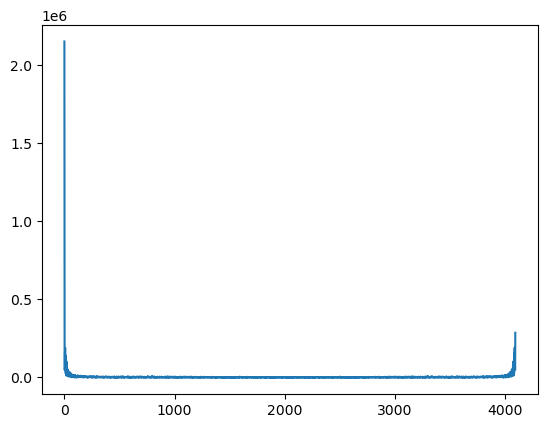

In [66]:
plt.plot(np.abs(SUB7fourier1))

In [67]:
SUB7fourier2

array([1963393.             -0.j        ,
       -112123.09364967-101342.9811692j ,
        -36929.38080867+130162.54730763j, ...,
        103671.81221247+287268.3876657j ,
        -36929.38080867-130162.54730763j,
       -112123.09364967+101342.9811692j ])

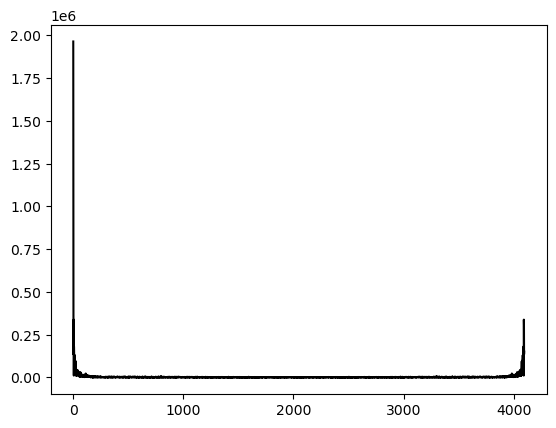

In [68]:
plt.plot(np.abs(SUB7fourier2), 'k')

In [69]:
SUB7fourier3

array([1999413.             -0.j        ,
       -101147.4936328 -142374.73564971j,
       -234616.813116  -124148.08280522j, ...,
        -35665.90185589 -88986.26390004j,
       -234616.813116  +124148.08280522j,
       -101147.4936328 +142374.73564971j])

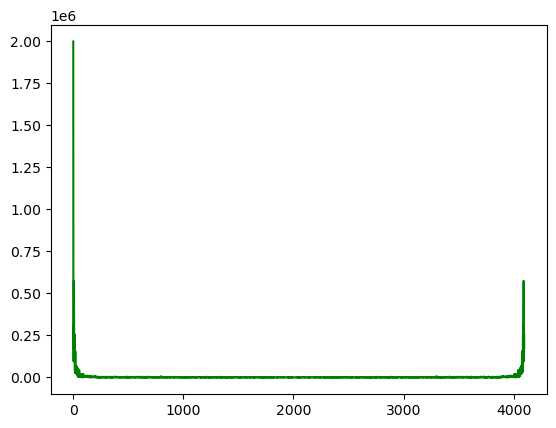

In [70]:
plt.plot(np.abs(SUB7fourier3), 'g')

In [71]:
SUB7fourier4

array([2308685.             -0.j        ,
         49097.55134956-313094.88977768j,
         78934.81236743-181472.04576334j, ...,
       -317648.14186148-112025.9478869j ,
         78934.81236743+181472.04576334j,
         49097.55134956+313094.88977768j])

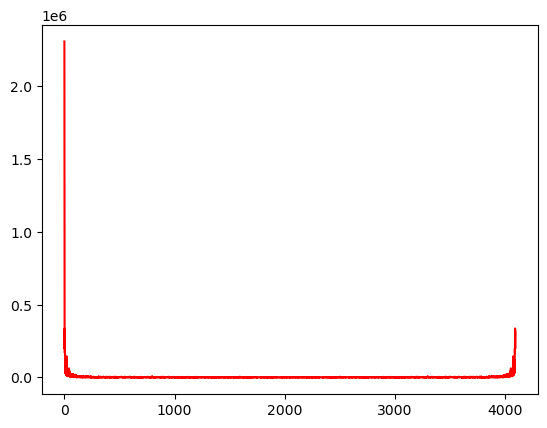

In [72]:
plt.plot(np.abs(SUB7fourier4), 'r')

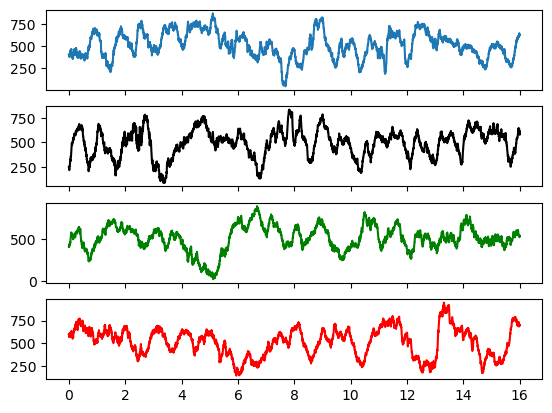

In [73]:
fig, axs = plt.subplots(4, sharex=True)
axs[0].plot(t, SUB8.F1)
axs[1].plot(t, SUB8.F2, 'k')
axs[2].plot(t, SUB8.F3, 'g')
axs[3].plot(t, SUB8.F4, 'r')

In [74]:
SUB8fourier1 = fft(SUB8.F1)
SUB8fourier2 = fft(SUB8.F2)
SUB8fourier3 = fft(SUB8.F3)
SUB8fourier4 = fft(SUB8.F4)

In [75]:
SUB8fourier1

array([2095911.            -0.j        ,    8772.044055  -88215.47487418j,
       -200728.43729598+13669.61916637j, ...,
         -6626.55568302-32573.620882j  , -200728.43729598-13669.61916637j,
          8772.044055  +88215.47487418j])

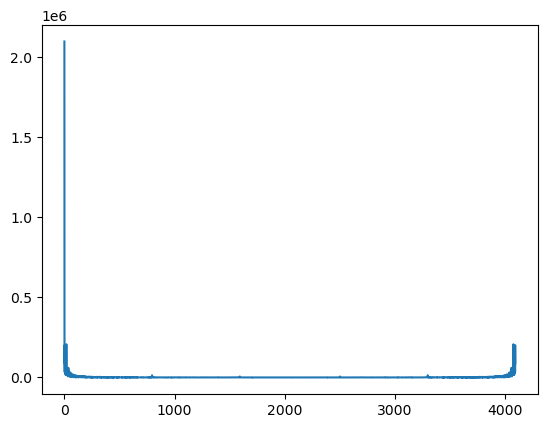

In [76]:
plt.plot(np.abs(SUB8fourier1))

In [77]:
SUB8fourier2

array([2025184.            -0.j        ,  -16800.61115061+15190.42396799j,
         49372.63940183+63664.59151576j, ...,
          6029.47119585-60586.02199735j,   49372.63940183-63664.59151576j,
        -16800.61115061-15190.42396799j])

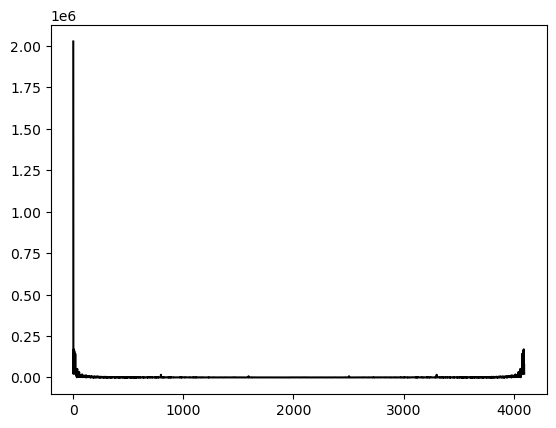

In [78]:
plt.plot(np.abs(SUB8fourier2), 'k')

In [79]:
SUB8fourier3

array([2100966.             -0.j        ,
        -15623.15577852 +60046.6164727j ,
        110779.53639935 -25859.01035482j, ...,
       -106284.29244841+137121.37716602j,
        110779.53639935 +25859.01035482j,
        -15623.15577852 -60046.6164727j ])

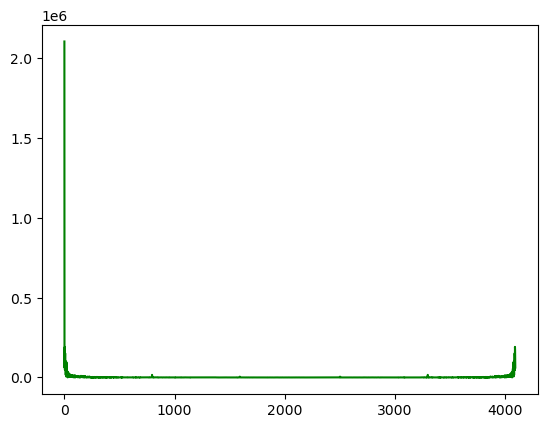

In [80]:
plt.plot(np.abs(SUB8fourier3), 'g')

In [81]:
SUB8fourier4

array([2113802.             -0.j        ,
         84372.66659304 +47046.85485193j,
         -5080.74610812-116572.51057282j, ...,
        -16512.57485613 -26678.39881766j,
         -5080.74610812+116572.51057282j,
         84372.66659304 -47046.85485193j])

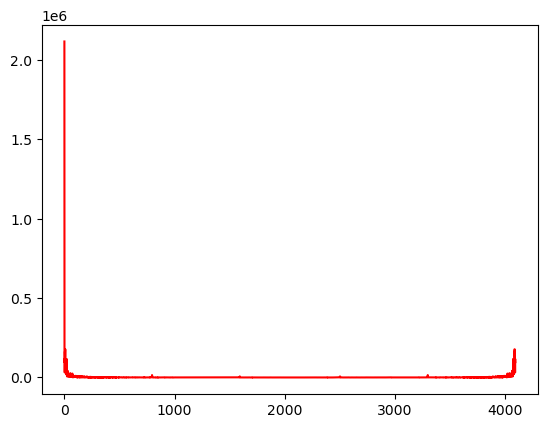

In [82]:
plt.plot(np.abs(SUB8fourier4), 'r')

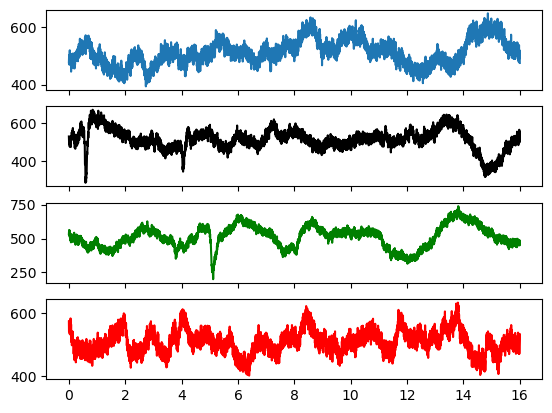

In [83]:
fig, axs = plt.subplots(4, sharex=True)
axs[0].plot(t, SUB9.F1)
axs[1].plot(t, SUB9.F2, 'k')
axs[2].plot(t, SUB9.F3, 'g')
axs[3].plot(t, SUB9.F4, 'r')

In [84]:
SUB9fourier1 = fft(SUB9.F1)
SUB9fourier2 = fft(SUB9.F2)
SUB9fourier3 = fft(SUB9.F3)
SUB9fourier4 = fft(SUB9.F4)

In [85]:
SUB9fourier1

array([2099843.            -0.j        ,  -27384.45607554+26973.35065338j,
         51601.92051242+10621.58974233j, ...,
         34384.37804012-59096.06959043j,   51601.92051242-10621.58974233j,
        -27384.45607554-26973.35065338j])

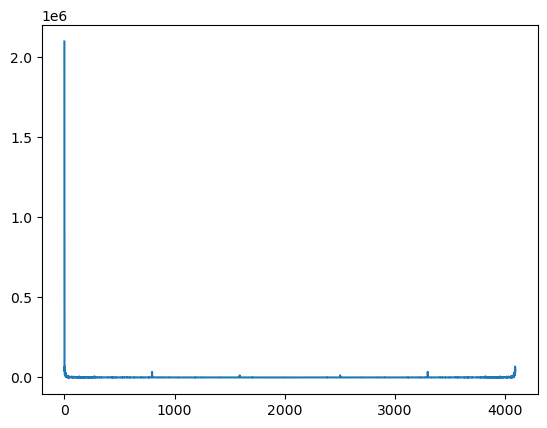

In [86]:
plt.plot(np.abs(SUB9fourier1))

In [87]:
SUB9fourier2

array([2102879.            -0.j        ,   -3775.76149617 +6434.51289992j,
         -7689.11170266-12109.84168139j, ...,
        -30360.45028908+70875.66872886j,   -7689.11170266+12109.84168139j,
         -3775.76149617 -6434.51289992j])

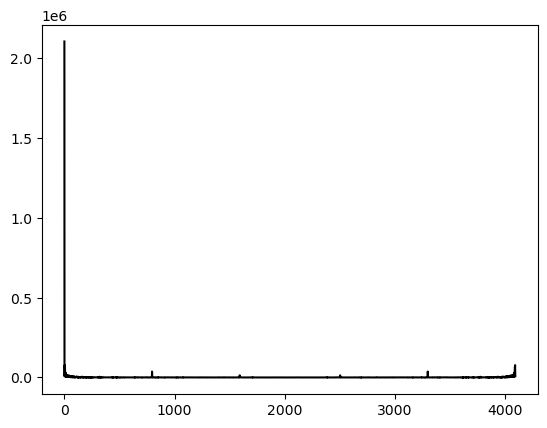

In [88]:
plt.plot(np.abs(SUB9fourier2), 'k')

In [89]:
SUB9fourier3

array([2098748.            -0.j        ,  -21024.61604151 +3605.87009091j,
         36088.56266797+66302.46345409j, ...,
        -31329.53299018-84668.71710263j,   36088.56266797-66302.46345409j,
        -21024.61604151 -3605.87009091j])

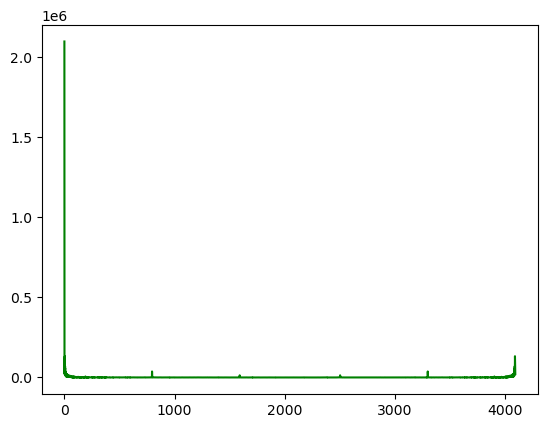

In [90]:
plt.plot(np.abs(SUB9fourier3), 'g')

In [91]:
SUB9fourier4

array([2081747.            -0.j        ,   -5091.72141751+15139.50649015j,
        -21250.95119692 -9207.19843005j, ...,
        -22098.8899213  -7920.34637935j,  -21250.95119692 +9207.19843005j,
         -5091.72141751-15139.50649015j])

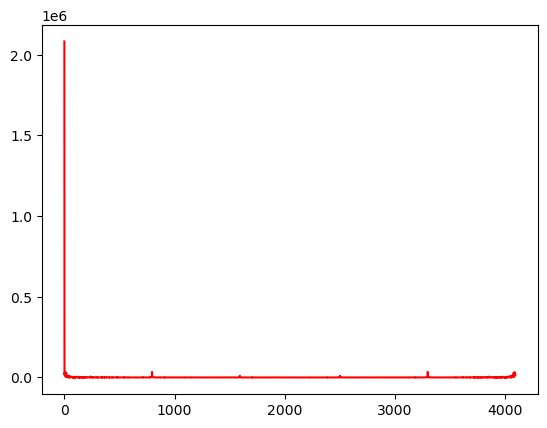

In [92]:
plt.plot(np.abs(SUB9fourier4), 'r')

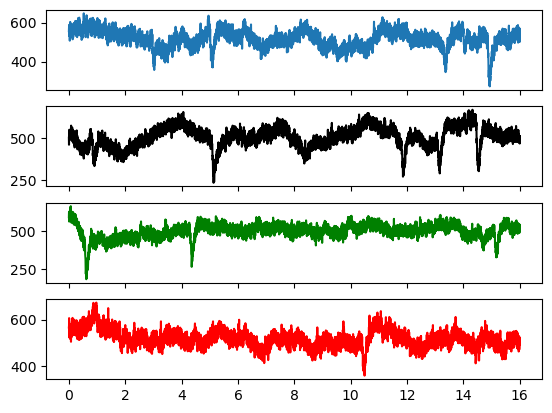

In [93]:
fig, axs = plt.subplots(4, sharex=True)
axs[0].plot(t, SUB10.F1)
axs[1].plot(t, SUB10.F2, 'k')
axs[2].plot(t, SUB10.F3, 'g')
axs[3].plot(t, SUB10.F4, 'r')

In [94]:
SUB10fourier1 = fft(SUB10.F1)
SUB10fourier2 = fft(SUB10.F2)
SUB10fourier3 = fft(SUB10.F3)
SUB10fourier4 = fft(SUB10.F4)

In [95]:
SUB10fourier1

array([2117106.            -0.j        ,   19480.27678983 -7266.51839877j,
         14216.75842729 -1125.4451749j , ...,
         19079.81292249+50776.12977752j,   14216.75842729 +1125.4451749j ,
         19480.27678983 +7266.51839877j])

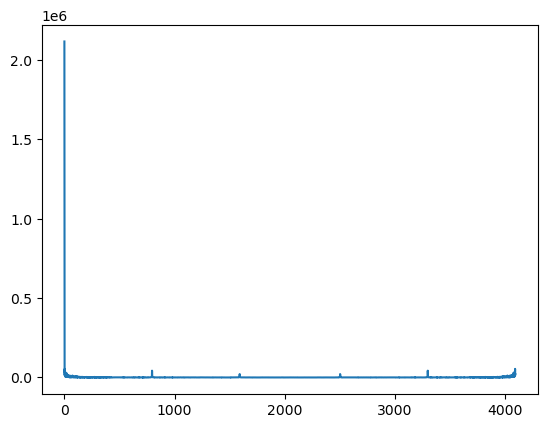

In [96]:
plt.plot(np.abs(SUB10fourier1))

In [97]:
SUB10fourier2

array([2061696.            -0.j        ,  -12899.34707639+20609.43532935j,
        -26920.33416682+22288.21003374j, ...,
         13060.09414878-55450.21047832j,  -26920.33416682-22288.21003374j,
        -12899.34707639-20609.43532935j])

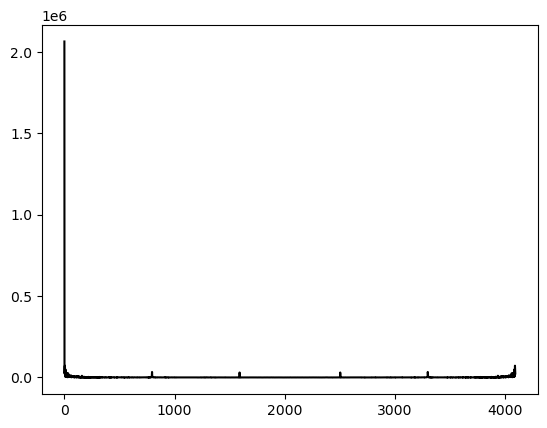

In [98]:
plt.plot(np.abs(SUB10fourier2), 'k')

In [99]:
SUB10fourier3

array([2037662.            -0.j        ,  -38573.4607703 +29422.07000146j,
        -14686.46312221+30666.62860966j, ...,
         13768.55297091 -8112.34809189j,  -14686.46312221-30666.62860966j,
        -38573.4607703 -29422.07000146j])

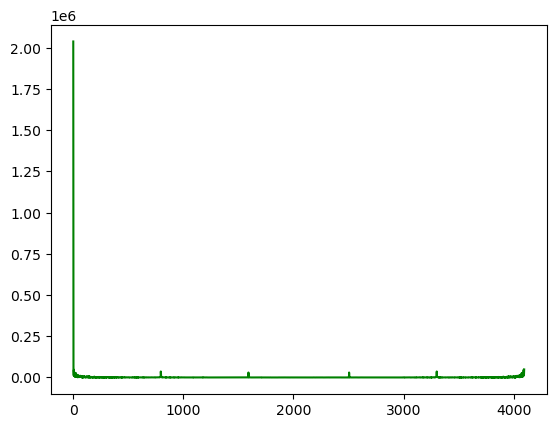

In [100]:
plt.plot(np.abs(SUB10fourier3), 'g')

In [101]:
SUB10fourier4

array([2.12037300e+06    -0.j        , 2.74363140e+04-13595.52415339j,
       6.68700102e+02-16358.48733689j, ...,
       2.34278068e+04+27952.0156238j , 6.68700102e+02+16358.48733689j,
       2.74363140e+04+13595.52415339j])

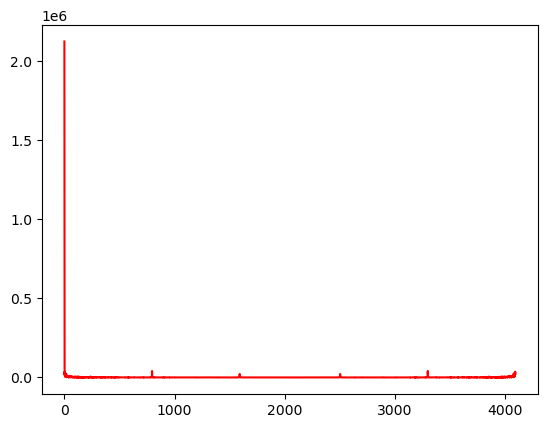

In [102]:
plt.plot(np.abs(SUB10fourier4), 'r')

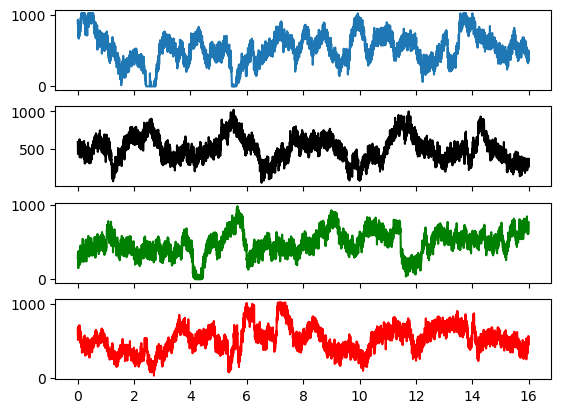

In [103]:
fig, axs = plt.subplots(4, sharex=True)
axs[0].plot(t, SUB11.F1)
axs[1].plot(t, SUB11.F2, 'k')
axs[2].plot(t, SUB11.F3, 'g')
axs[3].plot(t, SUB11.F4, 'r')

In [104]:
SUB11fourier1 = fft(SUB11.F1)
SUB11fourier2 = fft(SUB11.F2)
SUB11fourier3 = fft(SUB11.F3)
SUB11fourier4 = fft(SUB11.F4)

In [105]:
SUB11fourier1

array([2138893.             -0.j        ,
         22589.97804549+187090.25615624j,
        138979.57660954 +23506.74705795j, ...,
         68833.30228933-100101.10496505j,
        138979.57660954 -23506.74705795j,
         22589.97804549-187090.25615624j])

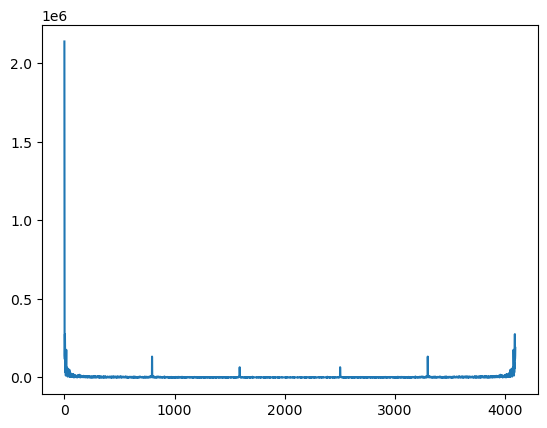

In [106]:
plt.plot(np.abs(SUB11fourier1))

In [107]:
SUB11fourier2

array([2044153.            -0.j        ,  -23036.05262186-25471.05390889j,
        -80663.37906512 +1810.86759996j, ...,
        -35827.7594071 +74863.2019407j ,  -80663.37906512 -1810.86759996j,
        -23036.05262186+25471.05390889j])

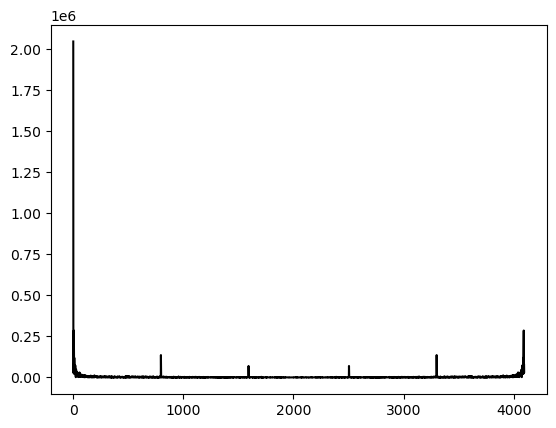

In [108]:
plt.plot(np.abs(SUB11fourier2), 'k')

In [109]:
SUB11fourier3

array([1963804.             -0.j        ,
        -25124.08037466+127756.70174622j,
         92540.57020967  +8862.06709027j, ...,
         79477.68000394 -67011.21020169j,
         92540.57020967  -8862.06709027j,
        -25124.08037466-127756.70174622j])

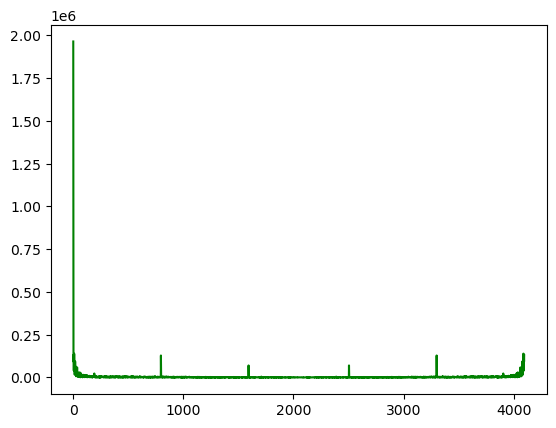

In [110]:
plt.plot(np.abs(SUB11fourier3), 'g')

In [111]:
SUB11fourier4

array([2102072.             -0.j        ,
       -102307.86634533 +80865.33382934j,
        -21221.46855658+234428.10428743j, ...,
        -52934.30726011 +70786.55891665j,
        -21221.46855658-234428.10428743j,
       -102307.86634533 -80865.33382934j])

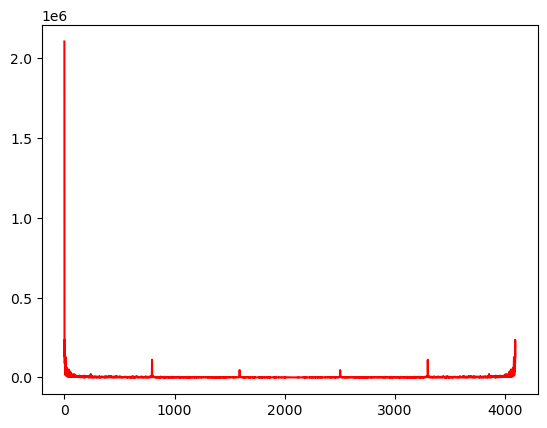

In [112]:
plt.plot(np.abs(SUB11fourier4), 'r')